## About this data: 
There are 15 netCDF files in the folder __OCEAN 215 - Autumn '20 - Course documents/Zoom class slides and notebooks/2020-12-01 - class #16 data__/ \
Each netCDF file corresponds to a single profile made by Argo float number 5901105. 

__File names:__
- D5901105_176.nc
- D5901105_177.nc
- D5901105_178.nc
- D5901105_179.nc
- D5901105_180.nc
- D5901105_181.nc
- D5901105_182.nc
- D5901105_183.nc
- D5901105_184.nc
- D5901105_185.nc
- D5901105_186.nc
- D5901105_187.nc
- D5901105_188.nc
- D5901105_189.nc
- D5901105_190.nc



### Activity 1: package management and import statements



1. With the below information, formulate the package management and  import statements that we will need for this activity.
> We will be reading temperature and salinity data from Argo netCDF files. We will be using the Gibbs Seawater Toolbox to convert the temperature and salinity into density ($\sigma_0$). 
Then we will be plotting all of this data; at least one plot will rely on a colomap from cmocean.


In [ ]:
# This code allows xarray and netCDF4 to work with Google Colab
!pip install netcdf4

# This code installs TEOS-10 gsw
!pip install gsw

# This code installs cmocean
!pip install cmocean

     |████████████████████████████████| 4.3MB 5.4MB/s 
     |████████████████████████████████| 296kB 41.3MB/s 
     |████████████████████████████████| 2.4MB 5.7MB/s 
     |████████████████████████████████| 225kB 5.9MB/s 


In [ ]:
import numpy as np
import xarray as xr
import gsw
import cmocean
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### Activity 2: using gsw

1. Pick one of the data files to open using xarray. Display the xarray dataset.
2. Extract the latitude (`LATITUDE`), longitude (`LONGITUDE`), temperature (`TEMP`), salinity (`PSAL`), and pressure (`PRES`) from the data file.



In [ ]:
filepath = '/content/drive/MyDrive/OCEAN 215 - Autumn \'20/OCEAN 215 - Autumn \'20 - Course documents/Zoom class slides and notebooks/2020-12-01 - class #16 - data/D5901105_190.nc'
data = xr.open_dataset(filepath)
# display(data)

lat = data['LATITUDE'].values
lon = data['LONGITUDE'].values
T = data['TEMP'].values
S = data['PSAL'].values
P = data['PRES'].values


3. Using the `?`, find out the required inputs to each of these functions.
> `gsw.SA_from_SP`
>
>`gsw.CT_from_t`
>
>`gsw.sigma0`
>


In [ ]:
gsw.SA_from_SP?
gsw.CT_from_t?
gsw.sigma0?

#Required: SP, p, lon, lat
#Required: SA, t, p
#Required: SA, CT

4. Using the above functions from the Gibbs Seawater Toolbox and their respective inputs, compute the density ($\sigma_0$) profile.

In [ ]:
SA = gsw.SA_from_SP(S,P,lon,lat)
CT = gsw.CT_from_t(SA,T,P)
sigma0 = gsw.sigma0(SA,CT)


5. Make a scatter plot with the measured salinity on the x-axis, the measured temperature on the y-axis, and calculated density as the color. Use the cmocean colormap of `dense_r` (you can find how to do this here: https://matplotlib.org/cmocean/ ). Make sure to properly label everything (and include a $\sigma_0$ on the colorbar label).

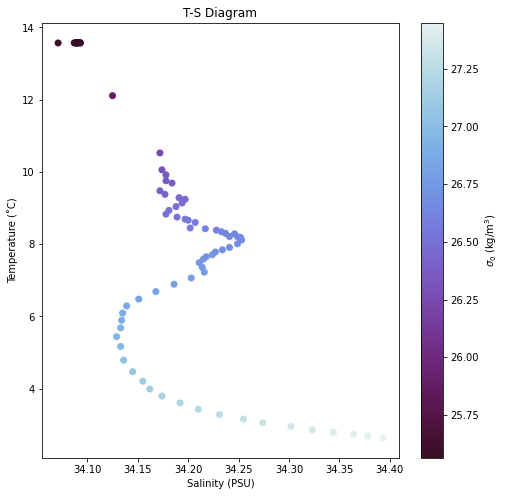

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes()

sctr = ax.scatter(S,T,c=sigma0,cmap=cmocean.cm.dense_r)
ax.set_xlabel('Salinity (PSU)')
ax.set_ylabel('Temperature (˚C)')
ax.set_title('T-S Diagram')
c = plt.colorbar(sctr,ax=ax)
c.set_label('$\sigma_0$ (kg/m$^3)$')

### Activity 3: string formatting

1. Create a list of the file different file names called `filenames` using string formatting in a for loop. 

In [ ]:
filenames = []
floatnumber = 5901105

for index in range(176,191):
  filenames.append('D{0}_{1:03d}.nc'.format(floatnumber,index))


### Activity 4: functions

1. Based on your code from Activity 2 (part 1 and 2), write a function to open any of the data files and extract the latitude (`LATITUDE`), longitude (`LONGITUDE`), temperature (`TEMP`), salinity (`PSAL`), and pressure (`PRES`). Make sure that your function is returning the data!

In [ ]:
def getdata(filepath,filename):
  data = xr.open_dataset(filepath+filename)
  lat = data['LATITUDE'].values
  lon = data['LONGITUDE'].values
  T = data['TEMP'].values
  S = data['PSAL'].values
  P = data['PRES'].values

  return lat, lon, T, S, P


2. Based your code from Activity 2 (part 4), write a function to calculate density from the data you loaded in the function from part 1.

In [ ]:
def calculate_density(lat,lon,T,S,P):
  SA = gsw.SA_from_SP(S,P,lon,lat)
  CT = gsw.CT_from_t(SA,T,P)
  sigma0 = gsw.sigma0(SA,CT)
  return sigma0


3. Based your code from Activity 2 (part 5), write a function to make a scatter plot for each of the profiles and save them as pngs to your drive. Have the measured salinity on the x-axis, the measured temperature on the y-axis, and calculated density as the color. Use the cmocean colormap of `dense_r` (you can find how to do this here: https://matplotlib.org/cmocean/ ). Make sure to properly label everything (and include a $\sigma_0$ on the colorbar label). Double check that your plot title and filename will change between plots! 

In [ ]:
def T_S_plot(T,S,sigma0,filepath,filename):
  fig = plt.figure(figsize=(8,8))
  ax = plt.axes()

  sctr = ax.scatter(S,T,c=sigma0,cmap=cmocean.cm.dense_r)
  ax.set_xlabel('Salinity (PSU)')
  ax.set_ylabel('Temperature (˚C)')
  ax.set_title('T-S Diagram:{}'.format(filename.split('.')[0]))
  c = plt.colorbar(sctr,ax=ax)
  c.set_label('$\sigma_0$ (kg/m$^3)$')
  plt.savefig(filepath+filename.split('.')[0]+'_TSDiagram.png')

### Activity 5: plotting the T-S diagram

1. Using the functions you created in Activity 4 and a for loop, create a plot for each profile and save it to your drive. 

D5901105_176.nc
D5901105_177.nc
D5901105_178.nc
D5901105_179.nc
D5901105_180.nc
D5901105_181.nc
D5901105_182.nc
D5901105_183.nc
D5901105_184.nc
D5901105_185.nc
D5901105_186.nc
D5901105_187.nc
D5901105_188.nc
D5901105_189.nc
D5901105_190.nc


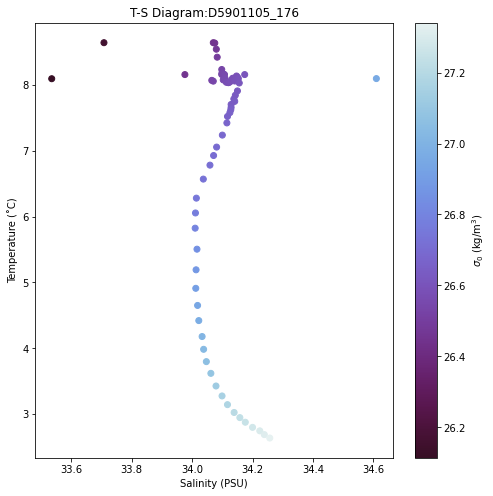

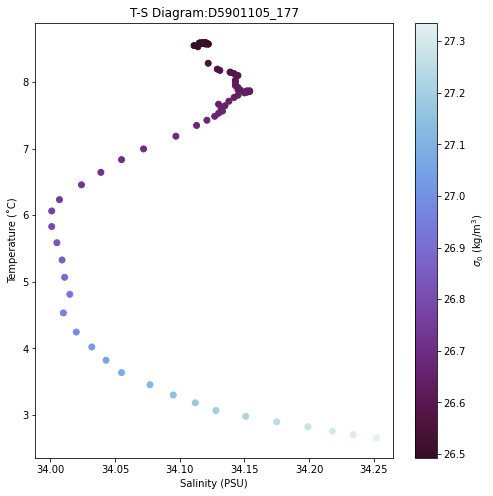

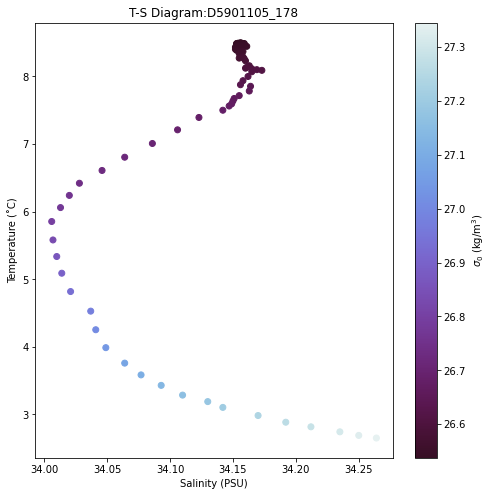

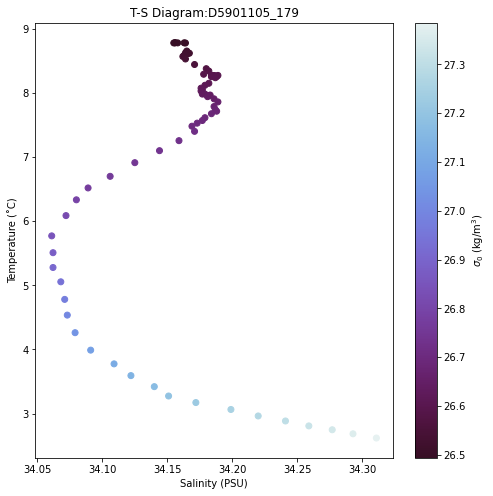

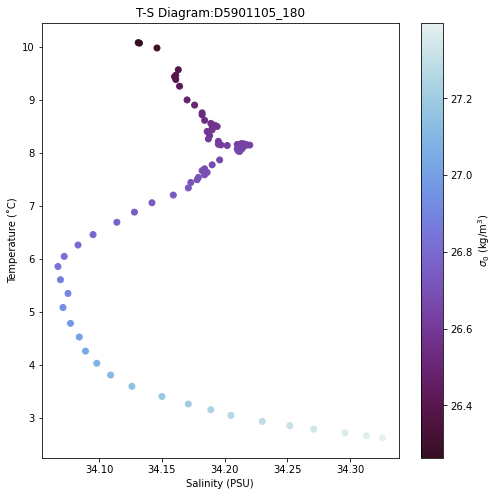

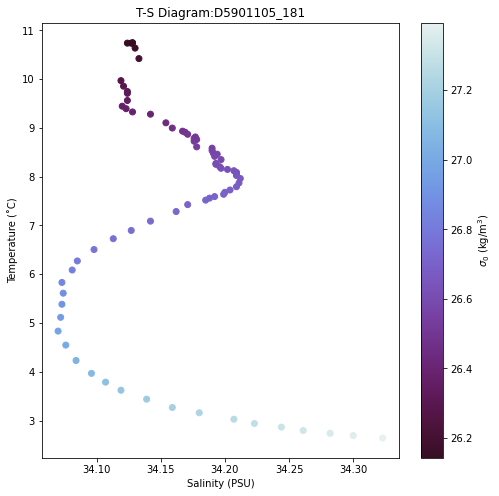

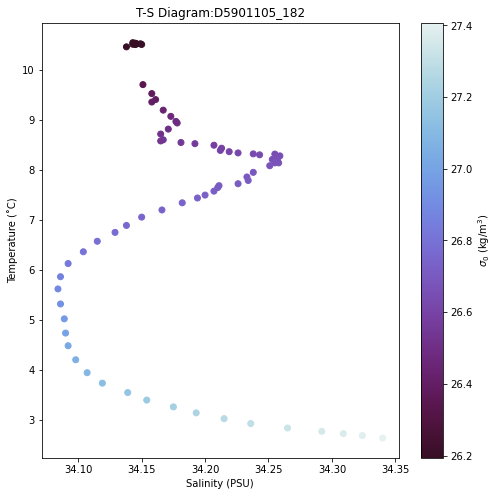

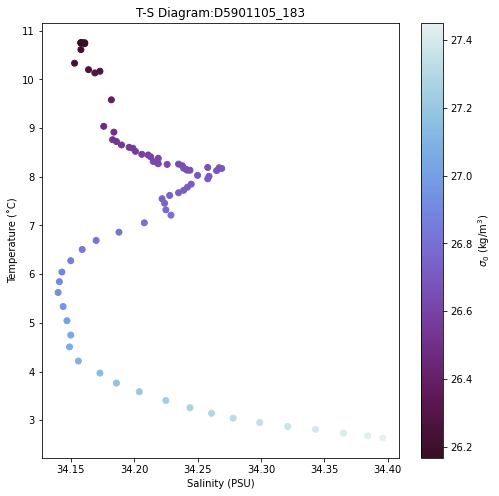

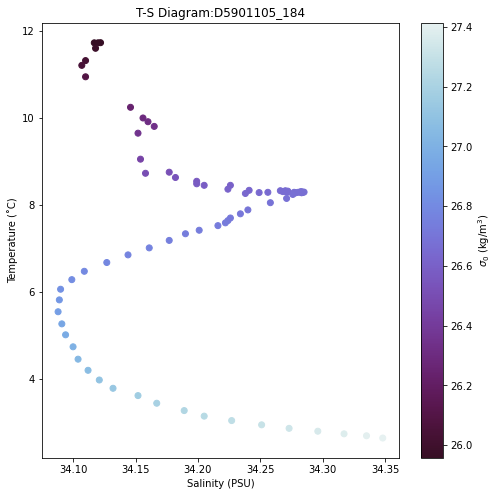

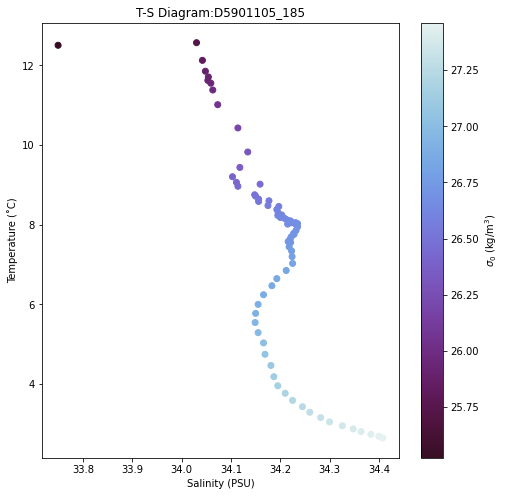

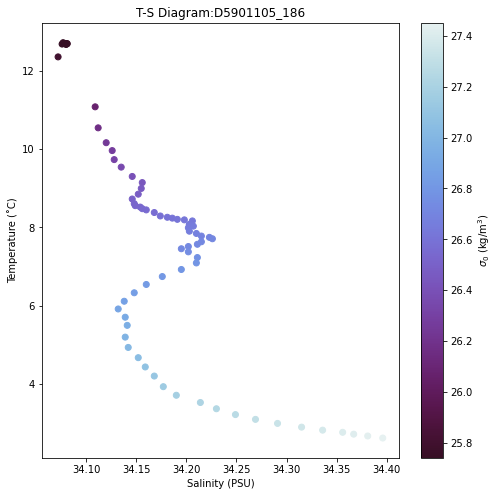

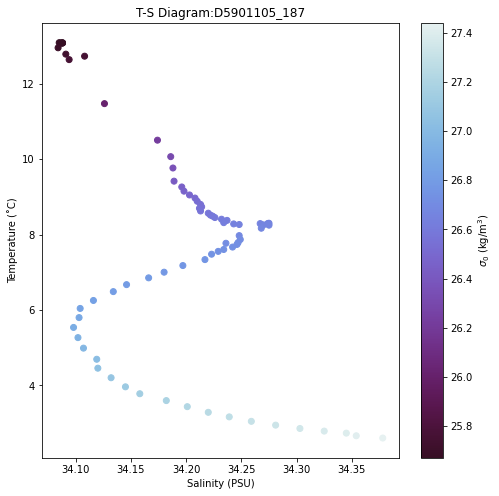

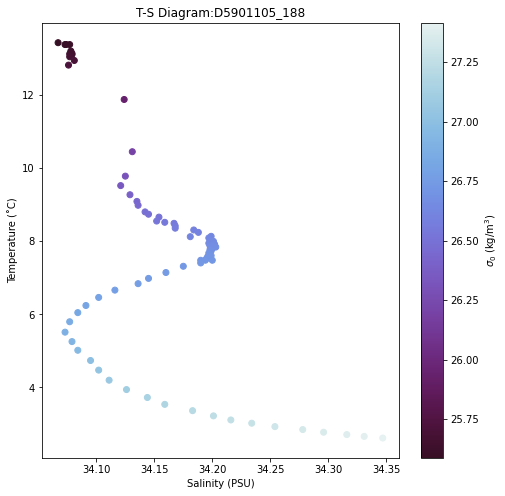

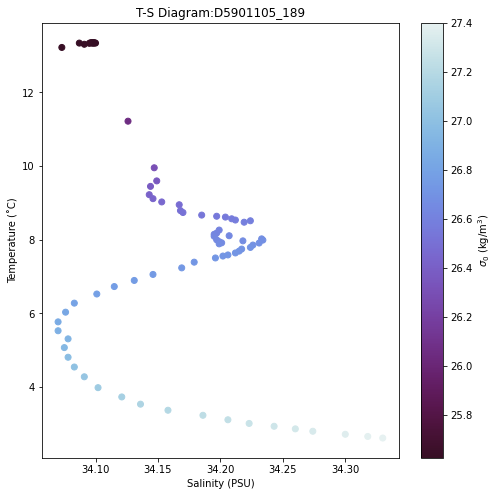

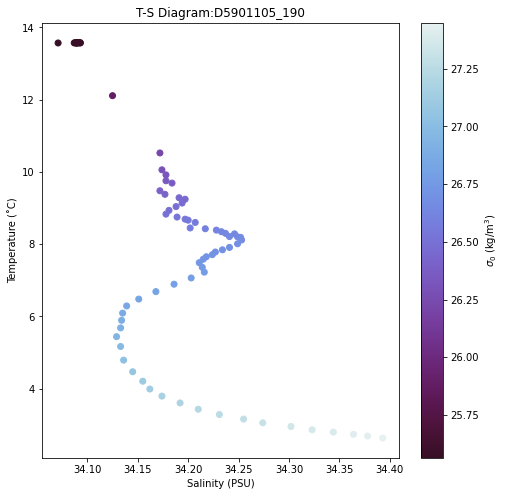

In [ ]:
filepath = 'drive/MyDrive/OCEAN 215 - Autumn \'20/OCEAN 215 - Autumn \'20 - Course documents/Zoom class slides and notebooks/2020-12-01 - class #16 - data/'

for index in range(len(filenames)):
  filename = filenames[index]
  print(filename)
  lat, lon, T, S, P = getdata(filepath,filename)
  sigma0 = calculate_density(lat, lon, T, S, P)
  T_S_plot(T,S,sigma0,'',filename)



### Activity 6: organization

1. If you were to share this code with a colleague, in what order would you put each of the activities done in this notebook? Is there a section you would leave out? Why?